# Linear Regression for gold price price prdiction<br>
#### Lakshya Garg<br> 211000027

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from datetime import datetime
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

### Loaded Libraries

In [37]:
custom_date_parser = lambda x: datetime.strptime(x,"%d-%m-%Y")
# Custom Parser to read date time 

In [38]:
monthly=pd.read_csv('gold_monthly.csv',parse_dates=['Date'],date_parser=custom_date_parser)
print(monthly.dtypes)
monthly

Date           datetime64[ns]
Open                   object
High                   object
Low                    object
Close*                 object
Adj Close**            object
dtype: object


,Date,Open,High,Low,Close*,Adj Close**
0,2022-12-30,"1,817.00","1,822.30","1,816.80","1,819.70","1,819.70"
1,2022-12-01,1768.7,1826.3,1764.3,1819.7,1819.7
2,2022-10-31,1630.8,1778.9,1615.1,1746,1746
3,2022-09-30,1667.2,1728,1622.8,1635.9,1635.9
4,2022-08-31,1707.9,1728.1,1620.4,1662.4,1662.4
5,2022-07-31,1763.9,1804.9,1708.5,1712.8,1712.8
6,2022-06-30,1795.5,1806.1,1679.8,1762.9,1762.9
7,2022-05-31,1831,1875.6,1801,1804.1,1804.1
8,2022-03-31,1935,1997.1,1872.9,1909.3,1909.3
9,2022-03-01,1908.3,2072,1893.5,1949.2,1949.2


### Data Pre-processing <br>
Converting object(string) data type to float

In [39]:
for i in monthly.columns:
    if i=='Date':
        continue
    else:
        monthly[i]=monthly[i].str.replace(',','')
        monthly[i]=monthly[i].astype(float)

# monthly['High']=monthly['High'].astype(float)
# monthly['Date'].astype({'Date':int})
print(monthly.dtypes)
monthly

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close*                float64
Adj Close**           float64
dtype: object


,Date,Open,High,Low,Close*,Adj Close**
0,2022-12-30,1817.0,1822.3,1816.8,1819.7,1819.7
1,2022-12-01,1768.7,1826.3,1764.3,1819.7,1819.7
2,2022-10-31,1630.8,1778.9,1615.1,1746.0,1746.0
3,2022-09-30,1667.2,1728.0,1622.8,1635.9,1635.9
4,2022-08-31,1707.9,1728.1,1620.4,1662.4,1662.4
5,2022-07-31,1763.9,1804.9,1708.5,1712.8,1712.8
6,2022-06-30,1795.5,1806.1,1679.8,1762.9,1762.9
7,2022-05-31,1831.0,1875.6,1801.0,1804.1,1804.1
8,2022-03-31,1935.0,1997.1,1872.9,1909.3,1909.3
9,2022-03-01,1908.3,2072.0,1893.5,1949.2,1949.2


In [40]:
monthly.sort_values('Date',ascending=True,inplace=True,ignore_index=True)
monthly

,Date,Open,High,Low,Close*,Adj Close**
0,2022-01-01,1830.1,1852.7,1778.8,1795.0,1795.0
1,2022-02-01,1797.2,1972.5,1787.9,1899.4,1899.4
2,2022-03-01,1908.3,2072.0,1893.5,1949.2,1949.2
3,2022-03-31,1935.0,1997.1,1872.9,1909.3,1909.3
4,2022-05-31,1831.0,1875.6,1801.0,1804.1,1804.1
5,2022-06-30,1795.5,1806.1,1679.8,1762.9,1762.9
6,2022-07-31,1763.9,1804.9,1708.5,1712.8,1712.8
7,2022-08-31,1707.9,1728.1,1620.4,1662.4,1662.4
8,2022-09-30,1667.2,1728.0,1622.8,1635.9,1635.9
9,2022-10-31,1630.8,1778.9,1615.1,1746.0,1746.0


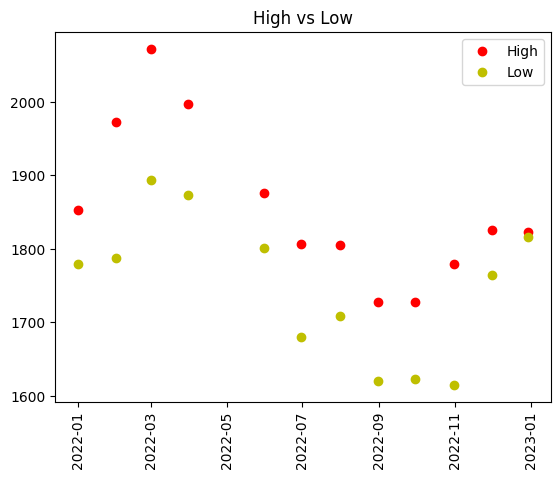

In [41]:
plt.plot(monthly['Date'],monthly['High'],'ro',label='High')
plt.plot(monthly['Date'],monthly['Low'],'yo',label='Low')
plt.xticks(rotation=90)
plt.title('High vs Low')
plt.legend(['High','Low'])
plt.show()


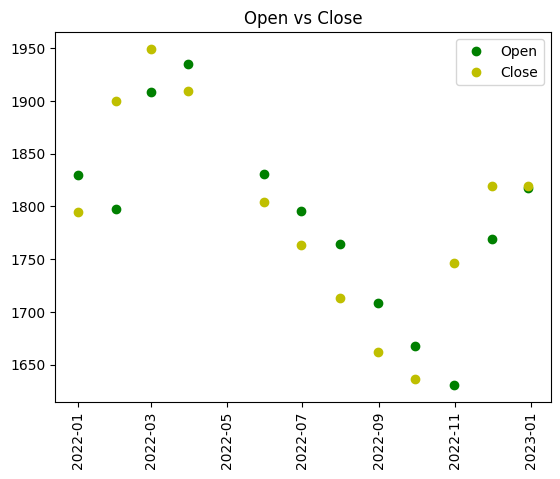

In [42]:
plt.plot(monthly['Date'],monthly['Open'],'go')
plt.plot(monthly['Date'],monthly['Close*'],'yo')
plt.xticks(rotation=90)
plt.title('Open vs Close')
plt.legend(['Open','Close'])
plt.show()

In [43]:
class LR:
    
    
    def __init__(self):
        pass    
        
    
    def fit_GD(self,X_train,y_train,epochs,alpha):
        cost_history=[]
        self.weights=np.ones(X_train.shape[1])
        new_weights=np.zeros(X_train.shape[1])
        self.bias=np.random.randint(np.min(y_train),np.max(y_train))
        for k in range(epochs):
            cost_history.append(self.MSE(y_train,self.predict(X_train)))
            # for i in range(X_train.shape[0]):
            new_weights=np.average((np.matmul(X_train,self.weights)+self.bias-y_train)*self.weights)
            # for i in range(X_train.shape[0]):
            new_bias=np.average((np.matmul(X_train,self.weights)+self.bias-y_train))

                
            # for j in range(X_train.shape[1]):
            self.weights-=(new_weights*alpha)
                # updating weights
            self.bias-=(alpha*new_bias)
                # updating bias
        cost_history.append(self.MSE(y_train,self.predict(X_train)))
        return cost_history


    def fit_direct(self,X_train,y_train):
        X_train_orig=X_train
        X_train=np.hstack((X_train,np.ones((X_train.shape[0],1))))
        self.weights=np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.bias=self.weights[-1]
        self.weights=self.weights[0:-1]
        return self.MSE(y_train,self.predict(X_train_orig))


    
    def predict(self,X_test):
        return np.matmul(X_test,self.weights)+self.bias
        
    
    def MSE(self,y_true,y_pred):
        a=y_true-y_pred
        return np.sum(a**2)/a.shape[0]
    # function for Mean Square Error Calculation 
    # It involves no loops it is faster (vectorized)
    


In [44]:
X_train=pd.DataFrame()
temp=[]
for index,i in enumerate(monthly['Date']):
    temp.append(index)

X_train['Date']=pd.DataFrame(temp)
y_train=monthly['High']
X_train.shape[0]
# y_train
# model.MSE(np.array([2.3,8.9]),np.array([9,8]))

12

In [45]:
model_implemented=LR()
graph_GD=model_implemented.fit_GD(X_train,y_train,  20,0.003)
model_scikit=linear_model.LinearRegression() #Implemented Linear Regression
model_scikit.fit(X_train,y_train) #Direct Computation using matrix inversion

LinearRegression()

In [46]:
y_pred_implemented=model_implemented.predict(X_train)
y_pred_scikit=model_scikit.predict(X_train)
print(model_implemented.weights,"Weight/s by GD")
print(model_implemented.bias,"Bias by GD")



[0.03198129] Weight/s by GD
1904.8379960074371 Bias by GD


In [47]:
print(model_implemented.MSE(y_train,y_pred_implemented))
print(mean_squared_error(y_train,y_pred_scikit))
print("Comparing MSE from scikit-direct weights calculation vs GD implemented")

13006.469814757926
6135.003540209788
Comparing MSE from scikit-direct weights calculation vs GD implemented


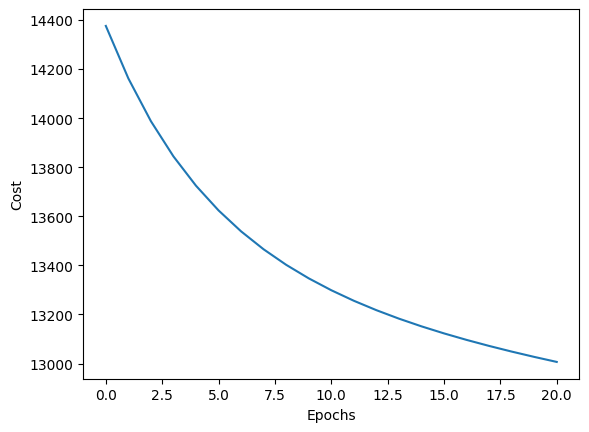

In [48]:
plt.plot(graph_GD)
plt.xlabel('Epochs')
plt.ylabel("Cost")
plt.show()

In [49]:
print(model_implemented.fit_direct(X_train,y_train))
print(mean_squared_error(y_train,y_pred_scikit))
print("MSE same by Matrix method for my implementation and scikit both")

6135.003540209788
6135.003540209788
MSE same by Matrix method for my implementation and scikit both


In [50]:
print("Prediction for Next Year")
model_implemented.predict([X_train.shape[0]+1])

Prediction for Next Year


1711.377622377622